**Importing Libraries**

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

**Get Boston House Price Dataset from fetch_openml API**

In [238]:
# url-http://lib.stat.cmu.edu/datasets/boston
house_price_dataset=fetch_openml(name='boston',version=1,parser='auto')
# parser='auto' is used to silence or to ignore any importing errors

**Loading Dataset to Pandas DataFrame**

In [239]:
house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

**Add Target (PRICE) Column to the DataFrame**

In [240]:
house_price_dataframe['PRICE']=house_price_dataset.target
# Converting categorical dtype to float64 dtype
house_price_dataframe['CHAS']=house_price_dataframe['CHAS'].astype('float64')
house_price_dataframe['RAD']=house_price_dataframe['RAD'].astype('float64')
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Checking No. of Rows and Columns in the DataFrame**

In [241]:
house_price_dataframe.shape

(506, 14)

**Checking for Missing Values**

In [242]:
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

**Statistical Measures of the Dataset**

In [243]:
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Understanding Correlation b/w all Features**

In [244]:
correlation=house_price_dataframe.corr()

**Constructing HeatMap to Understand the Correlation**

<Axes: >

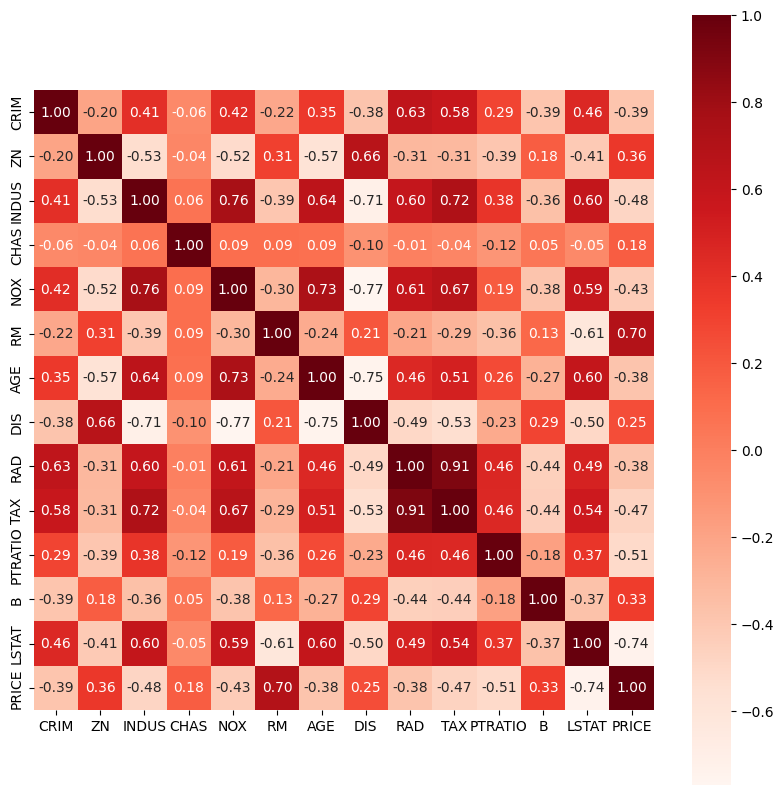

In [245]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot_kws={'size':10},annot=True,cmap='Reds')

**Splitting Features & Target**

In [246]:
x=house_price_dataframe.iloc[:,:13]
y=house_price_dataframe.iloc[:,-1]
feature_names=x.columns

**Data Pre-Processing**

In [247]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

**Splitting the Data into Training and Testing Samples**

In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [249]:
x.shape,x_train.shape,x_test.shape

((506, 13), (404, 13), (102, 13))

In [250]:
y.shape,y_train.shape,y_test.shape

((506,), (404,), (102,))

**Feature Selection**

In [251]:
model=XGBRegressor()
model.fit(x_train,y_train)
importances=model.feature_importances_
feature_importances=pd.DataFrame({'Feature':feature_names,'Importance':importances})
feature_importances=feature_importances.sort_values(by='Importance',ascending=False)
top_features=feature_importances.head(5)['Feature'].tolist()
feature_importances

,Feature,Importance
12,LSTAT,0.593436
5,RM,0.175255
7,DIS,0.056673
9,TAX,0.044670
10,PTRATIO,0.040481
4,NOX,0.019630
0,CRIM,0.018086
2,INDUS,0.013346
8,RAD,0.011397
11,B,0.010387


**Splitting the Feature Selected Data into Training and Testing Samples**

In [252]:
x=house_price_dataframe[top_features]
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**XGBoost Regressor Model Training using Selected Features**

In [253]:
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Prediction on Training Data**

In [254]:
x_train_pred=model.predict(x_train)

**R-Squared & Mean Absolute Errors of Training Data**

In [255]:
score_1=r2_score(x_train_pred,y_train)
score_2=mean_absolute_error(x_train_pred,y_train)
print('R-Squared Error :',score_1)
print('Mean Squared Error :',score_2)

R-Squared Error : 0.9998955672123903
Mean Squared Error : 0.06759400721823824


**Visualizing Actual Price vs Predicted Price on Training Data**

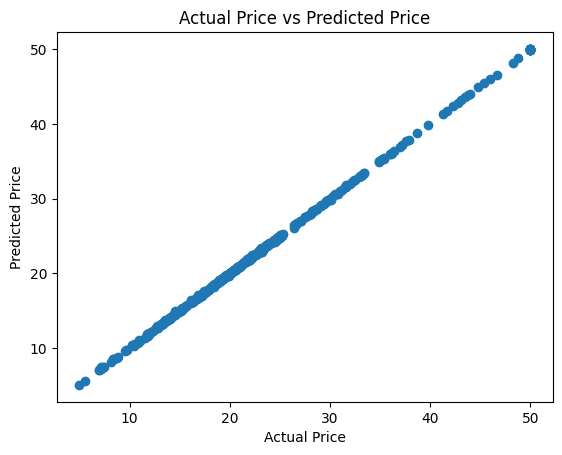

In [256]:
plt.scatter(y_train,x_train_pred)
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Model Evaluation**

**Prediction on Test Data**


In [257]:
x_test_pred=model.predict(x_test)

**R-Squared & Mean Absolute Errors of Test Data**

In [259]:
score_1=r2_score(x_test_pred,y_test)
score_2=mean_absolute_error(x_test_pred,y_test)
print('R-Squared Error :',score_1)
print('Mean Squared Error :',score_2)

R-Squared Error : 0.83995819804757
Mean Squared Error : 2.174501342399448


**Visualizing Actual Price vs Predicted Price on Test Data**

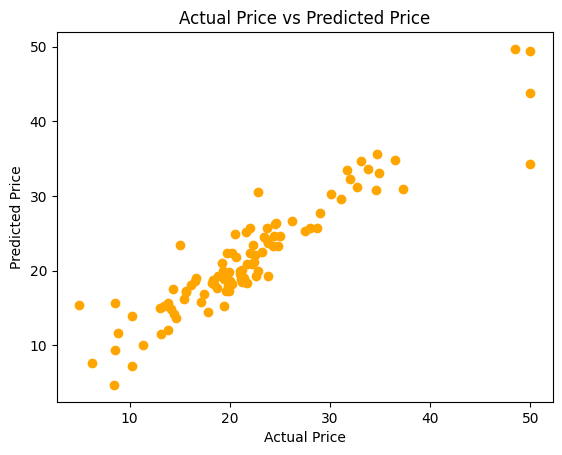

In [260]:
plt.scatter(y_test,x_test_pred,c='orange')
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Testing with Sample Input**

In [261]:
top_feature=top_features.append("PRICE")
house_price_dataframe[top_features].head()

,LSTAT,RM,DIS,TAX,PTRATIO,PRICE
0,4.98,6.575,4.0900,296.0,15.3,24.0
1,9.14,6.421,4.9671,242.0,17.8,21.6
2,4.03,7.185,4.9671,242.0,17.8,34.7
3,2.94,6.998,6.0622,222.0,18.7,33.4
4,5.33,7.147,6.0622,222.0,18.7,36.2


In [272]:
input=np.array([4.03,7.185,4.9671,242.0,17.8]).reshape(1,-1)
input=scaler.transform(input)
prediction=model.predict(input)
print("Predicted Price :",prediction[0])

Predicted Price : 35.555893


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Saving the Trained Model**


In [282]:
pickle.dump(model,open('trained_model.pkl','wb'))

**Saving the Scaler Object**

In [283]:
pickle.dump(scaler,open('scaler.sav','wb'))